In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/0f72db9c-d635-4415-9781-68937328aed2___NREC_B.Spot 9188.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/1b8d3e98-43d9-441d-93ef-a359e6e9ddc2___NREC_B.Spot 9052.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/b6d35d21-4812-4e32-ab9a-b6ddda8cbb79___JR_B.Spot 8972.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/e4e7e5a2-5aa1-4378-833d-9142358c7c9b___JR_B.Spot 9092.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/8b50f2db-cbf2-4758-bea6-a011f0cc1497___JR_B.Spot 3235.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/729b55d7-2a99-4861-910d-3b4e2bbce13a___JR_B.Spot 9036.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/4614ed01-e120-4ae9-8f13-028fa8297873___JR_B.Spot 8985.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/b143a281-5395-4a2a-8308-f6b23a

In [23]:
# import the necessary packages

from torchvision.models import resnet50
from torchvision import transforms
from tqdm import tqdm
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import torch
import time

In [24]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split  

In [25]:
from torchvision.models import resnet50


In [26]:
DATASET_PATH = "/kaggle/input/plantdisease/PlantVillage"

In [27]:
trainTansform = transforms.Compose([
	transforms.RandomResizedCrop(224),
	transforms.RandomHorizontalFlip(),
	transforms.RandomRotation(90),
	transforms.ToTensor(),
# 	transforms.Normalize(mean=[0.5,0.5 ,0.5], std=[0.5,0.5])
])

valTransform = transforms.Compose([
	transforms.Resize((224, 224)),
	transforms.ToTensor(),
	transforms.Normalize(mean=[0.5,0.5 ,0.5], std=[0.5,0.5 ,0.5])
])

In [28]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', DEVICE)

Using device: cuda


In [29]:
Total_Data = ImageFolder(DATASET_PATH, transform=trainTansform)

In [30]:
ClassIdx_dict = Total_Data.class_to_idx

In [31]:
Total_Data

Dataset ImageFolder
    Number of datapoints: 20638
    Root location: /kaggle/input/plantdisease/PlantVillage
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-90.0, 90.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )

In [51]:
ClassIdx_dict

{0: 'Pepper__bell___Bacterial_spot',
 1: 'Pepper__bell___healthy',
 2: 'Potato___Early_blight',
 3: 'Potato___Late_blight',
 4: 'Potato___healthy',
 5: 'Tomato_Bacterial_spot',
 6: 'Tomato_Early_blight',
 7: 'Tomato_Late_blight',
 8: 'Tomato_Leaf_Mold',
 9: 'Tomato_Septoria_leaf_spot',
 10: 'Tomato_Spider_mites_Two_spotted_spider_mite',
 11: 'Tomato__Target_Spot',
 12: 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 13: 'Tomato__Tomato_mosaic_virus',
 14: 'Tomato_healthy'}

In [50]:
ClassIdx_dict = {i: class_name for i, class_name in enumerate(Total_Data.classes)}

In [33]:
NUM_CLASSES = len(ClassIdx_dict)
NUM_CLASSES

15

In [34]:
train_data , test_data= train_test_split(Total_Data,train_size=0.8,shuffle=True, random_state=42)

In [35]:
print('Number of training examples: {}'.format(len(train_data)))
print('Number of test examples: {}'.format(len(test_data)))

Number of training examples: 16510
Number of test examples: 4128


In [36]:
# Create data loaders for train and test datasets
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True, pin_memory=True)

In [37]:
# Print some basic information about the train and test loaders
print('Number of training batches: {}'.format(len(train_loader)))
print('Number of test batches: {}'.format(len(test_loader)))

Number of training batches: 516
Number of test batches: 129


In [38]:
model = resnet50(pretrained=True)


for param in model.parameters():
	param.requires_grad = False
    
    

modelOutputFeats = model.fc.in_features
model.fc = nn.Linear(modelOutputFeats, NUM_CLASSES)
model = model.to(DEVICE)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [39]:
lossFunc = nn.CrossEntropyLoss()

opt = torch.optim.Adam(model.fc.parameters(), lr=0.0001)

In [40]:
H = {"train_loss": [], "train_acc": [], "val_loss": [],
	"val_acc": []}

In [43]:
EPOCHS=40

In [44]:
# Initialize parameters for early stopping
patience = 5  # Number of epochs to wait before stopping after no improvement
best_val_loss = float("inf")
epochs_no_improve = 0

# Training loop
print("[INFO] training the network...")
startTime = time.time()




for e in tqdm(range(EPOCHS)):
    model.train()
    totalTrainLoss = 0
    totalValLoss = 0
    trainCorrect = 0
    valCorrect = 0

    # Loop over training batches
    for (i, (x, y)) in enumerate(train_loader):
        (x, y) = (x.to(DEVICE), y.to(DEVICE))

        # Forward pass
        pred = model(x)
        loss = lossFunc(pred, y)

        # Backward pass
        loss.backward()

        # Update weights
        if (i + 1) % 2 == 0:
            opt.step()
            opt.zero_grad()

        # Accumulate loss and correct predictions
        totalTrainLoss += loss.item()
        trainCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Validation phase (no gradient tracking)
    with torch.no_grad():
        model.eval()
        for (x, y) in test_loader:
            (x, y) = (x.to(DEVICE), y.to(DEVICE))

            pred = model(x)
            totalValLoss += lossFunc(pred, y).item()
            valCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Calculate average losses and accuracy
    avgTrainLoss = totalTrainLoss / len(train_loader)
    avgValLoss = totalValLoss / len(test_loader)
    trainCorrect = trainCorrect / len(train_data)
    valCorrect = valCorrect / len(test_data)

    # Record losses and accuracy
    H["train_loss"].append(avgTrainLoss)
    H["train_acc"].append(trainCorrect)
    H["val_loss"].append(avgValLoss)
    H["val_acc"].append(valCorrect)

    # Print epoch progress
    print("[INFO] EPOCH: {}/{}".format(e + 1, EPOCHS))
    print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(avgTrainLoss, trainCorrect))
    print("Val loss: {:.6f}, Val accuracy: {:.4f}".format(avgValLoss, valCorrect))

    # Check for improvement
    if avgValLoss < best_val_loss:
        best_val_loss = avgValLoss
        epochs_no_improve = 0
        # Save model if validation loss improved
        torch.save(model.state_dict(), "best_model.pth")
        print(f"[INFO] Validation loss improved; saving model at epoch {e + 1}")
    else:
        epochs_no_improve += 1
        print(f"[INFO] No improvement in validation loss for {epochs_no_improve} epoch(s)")

    # Early stopping
    if epochs_no_improve >= patience:
        print("[INFO] Early stopping triggered")
        break

# Display total time for training
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(endTime - startTime))


[INFO] training the network...


  2%|▎         | 1/40 [01:02<40:22, 62.11s/it]

[INFO] EPOCH: 1/40
Train loss: 1.554333, Train accuracy: 0.6135
Val loss: 1.339778, Val accuracy: 0.6710
[INFO] Validation loss improved; saving model at epoch 1
[INFO] EPOCH: 2/40
Train loss: 1.290311, Train accuracy: 0.6722
Val loss: 1.162324, Val accuracy: 0.6909


  5%|▌         | 2/40 [02:05<39:38, 62.59s/it]

[INFO] Validation loss improved; saving model at epoch 2
[INFO] EPOCH: 3/40
Train loss: 1.132771, Train accuracy: 0.7044
Val loss: 1.039704, Val accuracy: 0.7304


  8%|▊         | 3/40 [03:07<38:41, 62.75s/it]

[INFO] Validation loss improved; saving model at epoch 3
[INFO] EPOCH: 4/40
Train loss: 1.036798, Train accuracy: 0.7245
Val loss: 0.952472, Val accuracy: 0.7459


 10%|█         | 4/40 [04:11<37:44, 62.89s/it]

[INFO] Validation loss improved; saving model at epoch 4
[INFO] EPOCH: 5/40
Train loss: 0.959793, Train accuracy: 0.7376
Val loss: 0.896561, Val accuracy: 0.7580


 12%|█▎        | 5/40 [05:14<36:43, 62.95s/it]

[INFO] Validation loss improved; saving model at epoch 5
[INFO] EPOCH: 6/40
Train loss: 0.904358, Train accuracy: 0.7504
Val loss: 0.854993, Val accuracy: 0.7660


 15%|█▌        | 6/40 [06:17<35:42, 63.01s/it]

[INFO] Validation loss improved; saving model at epoch 6
[INFO] EPOCH: 7/40
Train loss: 0.861352, Train accuracy: 0.7594
Val loss: 0.813417, Val accuracy: 0.7713


 18%|█▊        | 7/40 [07:20<34:39, 63.01s/it]

[INFO] Validation loss improved; saving model at epoch 7
[INFO] EPOCH: 8/40
Train loss: 0.829686, Train accuracy: 0.7643
Val loss: 0.790662, Val accuracy: 0.7742


 20%|██        | 8/40 [08:23<33:36, 63.01s/it]

[INFO] Validation loss improved; saving model at epoch 8
[INFO] EPOCH: 9/40
Train loss: 0.796624, Train accuracy: 0.7728
Val loss: 0.753663, Val accuracy: 0.7875


 22%|██▎       | 9/40 [09:26<32:34, 63.06s/it]

[INFO] Validation loss improved; saving model at epoch 9
[INFO] EPOCH: 10/40
Train loss: 0.773859, Train accuracy: 0.7756
Val loss: 0.737651, Val accuracy: 0.7897


 25%|██▌       | 10/40 [10:29<31:31, 63.04s/it]

[INFO] Validation loss improved; saving model at epoch 10
[INFO] EPOCH: 11/40
Train loss: 0.748231, Train accuracy: 0.7859
Val loss: 0.723681, Val accuracy: 0.7938


 28%|██▊       | 11/40 [11:32<30:28, 63.05s/it]

[INFO] Validation loss improved; saving model at epoch 11
[INFO] EPOCH: 12/40
Train loss: 0.728478, Train accuracy: 0.7865
Val loss: 0.697720, Val accuracy: 0.7980


 30%|███       | 12/40 [12:35<29:24, 63.04s/it]

[INFO] Validation loss improved; saving model at epoch 12
[INFO] EPOCH: 13/40
Train loss: 0.710518, Train accuracy: 0.7952
Val loss: 0.693700, Val accuracy: 0.7951


 32%|███▎      | 13/40 [13:38<28:23, 63.10s/it]

[INFO] Validation loss improved; saving model at epoch 13
[INFO] EPOCH: 14/40
Train loss: 0.700752, Train accuracy: 0.7944
Val loss: 0.677536, Val accuracy: 0.7984


 35%|███▌      | 14/40 [14:41<27:19, 63.07s/it]

[INFO] Validation loss improved; saving model at epoch 14
[INFO] EPOCH: 15/40
Train loss: 0.680806, Train accuracy: 0.7981
Val loss: 0.661008, Val accuracy: 0.8057


 38%|███▊      | 15/40 [15:44<26:16, 63.06s/it]

[INFO] Validation loss improved; saving model at epoch 15
[INFO] EPOCH: 16/40
Train loss: 0.671180, Train accuracy: 0.8015
Val loss: 0.653045, Val accuracy: 0.8062


 40%|████      | 16/40 [16:47<25:12, 63.03s/it]

[INFO] Validation loss improved; saving model at epoch 16
[INFO] EPOCH: 17/40
Train loss: 0.660818, Train accuracy: 0.8041
Val loss: 0.642266, Val accuracy: 0.8079


 42%|████▎     | 17/40 [17:50<24:08, 62.98s/it]

[INFO] Validation loss improved; saving model at epoch 17
[INFO] EPOCH: 18/40
Train loss: 0.647631, Train accuracy: 0.8031
Val loss: 0.638986, Val accuracy: 0.8089


 45%|████▌     | 18/40 [18:53<23:05, 62.97s/it]

[INFO] Validation loss improved; saving model at epoch 18
[INFO] EPOCH: 19/40
Train loss: 0.642691, Train accuracy: 0.8058
Val loss: 0.628361, Val accuracy: 0.8120


 48%|████▊     | 19/40 [19:56<22:02, 62.99s/it]

[INFO] Validation loss improved; saving model at epoch 19
[INFO] EPOCH: 20/40
Train loss: 0.628227, Train accuracy: 0.8123
Val loss: 0.624076, Val accuracy: 0.8140


 50%|█████     | 20/40 [20:59<20:59, 62.98s/it]

[INFO] Validation loss improved; saving model at epoch 20
[INFO] EPOCH: 21/40
Train loss: 0.621382, Train accuracy: 0.8131
Val loss: 0.613849, Val accuracy: 0.8147


 52%|█████▎    | 21/40 [22:02<19:56, 62.96s/it]

[INFO] Validation loss improved; saving model at epoch 21
[INFO] EPOCH: 22/40
Train loss: 0.617398, Train accuracy: 0.8107
Val loss: 0.602907, Val accuracy: 0.8193


 55%|█████▌    | 22/40 [23:05<18:53, 62.99s/it]

[INFO] Validation loss improved; saving model at epoch 22


 57%|█████▊    | 23/40 [24:08<17:51, 63.01s/it]

[INFO] EPOCH: 23/40
Train loss: 0.609790, Train accuracy: 0.8142
Val loss: 0.607931, Val accuracy: 0.8166
[INFO] No improvement in validation loss for 1 epoch(s)


 60%|██████    | 24/40 [25:11<16:48, 63.03s/it]

[INFO] EPOCH: 24/40
Train loss: 0.603529, Train accuracy: 0.8170
Val loss: 0.604708, Val accuracy: 0.8193
[INFO] No improvement in validation loss for 2 epoch(s)
[INFO] EPOCH: 25/40
Train loss: 0.592190, Train accuracy: 0.8232
Val loss: 0.598420, Val accuracy: 0.8190


 62%|██████▎   | 25/40 [26:14<15:45, 63.03s/it]

[INFO] Validation loss improved; saving model at epoch 25
[INFO] EPOCH: 26/40
Train loss: 0.587331, Train accuracy: 0.8179
Val loss: 0.588968, Val accuracy: 0.8200


 65%|██████▌   | 26/40 [27:17<14:42, 63.03s/it]

[INFO] Validation loss improved; saving model at epoch 26


 68%|██████▊   | 27/40 [28:20<13:38, 62.98s/it]

[INFO] EPOCH: 27/40
Train loss: 0.580759, Train accuracy: 0.8252
Val loss: 0.586529, Val accuracy: 0.8205
[INFO] Validation loss improved; saving model at epoch 27
[INFO] EPOCH: 28/40
Train loss: 0.580370, Train accuracy: 0.8211
Val loss: 0.580535, Val accuracy: 0.8222


 70%|███████   | 28/40 [29:23<12:35, 62.99s/it]

[INFO] Validation loss improved; saving model at epoch 28
[INFO] EPOCH: 29/40
Train loss: 0.574350, Train accuracy: 0.8220
Val loss: 0.579773, Val accuracy: 0.8212


 72%|███████▎  | 29/40 [30:26<11:32, 62.97s/it]

[INFO] Validation loss improved; saving model at epoch 29
[INFO] EPOCH: 30/40
Train loss: 0.573097, Train accuracy: 0.8231
Val loss: 0.579576, Val accuracy: 0.8178


 75%|███████▌  | 30/40 [31:29<10:30, 63.04s/it]

[INFO] Validation loss improved; saving model at epoch 30
[INFO] EPOCH: 31/40
Train loss: 0.569520, Train accuracy: 0.8254
Val loss: 0.572170, Val accuracy: 0.8227


 78%|███████▊  | 31/40 [32:32<09:26, 62.99s/it]

[INFO] Validation loss improved; saving model at epoch 31
[INFO] EPOCH: 32/40
Train loss: 0.567347, Train accuracy: 0.8236
Val loss: 0.559458, Val accuracy: 0.8256


 80%|████████  | 32/40 [33:35<08:23, 62.97s/it]

[INFO] Validation loss improved; saving model at epoch 32


 82%|████████▎ | 33/40 [34:38<07:20, 62.97s/it]

[INFO] EPOCH: 33/40
Train loss: 0.555274, Train accuracy: 0.8319
Val loss: 0.565922, Val accuracy: 0.8251
[INFO] No improvement in validation loss for 1 epoch(s)


 85%|████████▌ | 34/40 [35:41<06:17, 62.98s/it]

[INFO] EPOCH: 34/40
Train loss: 0.550002, Train accuracy: 0.8305
Val loss: 0.573011, Val accuracy: 0.8222
[INFO] No improvement in validation loss for 2 epoch(s)
[INFO] EPOCH: 35/40
Train loss: 0.546564, Train accuracy: 0.8326
Val loss: 0.558770, Val accuracy: 0.8282


 88%|████████▊ | 35/40 [36:44<05:14, 62.99s/it]

[INFO] Validation loss improved; saving model at epoch 35
[INFO] EPOCH: 36/40
Train loss: 0.543653, Train accuracy: 0.8306
Val loss: 0.553449, Val accuracy: 0.8280


 90%|█████████ | 36/40 [37:47<04:11, 62.99s/it]

[INFO] Validation loss improved; saving model at epoch 36
[INFO] EPOCH: 37/40
Train loss: 0.538281, Train accuracy: 0.8342
Val loss: 0.549313, Val accuracy: 0.8268


 92%|█████████▎| 37/40 [38:50<03:09, 63.01s/it]

[INFO] Validation loss improved; saving model at epoch 37
[INFO] EPOCH: 38/40
Train loss: 0.541871, Train accuracy: 0.8328
Val loss: 0.545517, Val accuracy: 0.8316


 95%|█████████▌| 38/40 [39:53<02:06, 63.02s/it]

[INFO] Validation loss improved; saving model at epoch 38
[INFO] EPOCH: 39/40
Train loss: 0.535268, Train accuracy: 0.8324
Val loss: 0.544402, Val accuracy: 0.8307


 98%|█████████▊| 39/40 [40:56<01:03, 63.02s/it]

[INFO] Validation loss improved; saving model at epoch 39


100%|██████████| 40/40 [41:59<00:00, 62.99s/it]

[INFO] EPOCH: 40/40
Train loss: 0.527094, Train accuracy: 0.8374
Val loss: 0.547514, Val accuracy: 0.8256
[INFO] No improvement in validation loss for 1 epoch(s)
[INFO] total time taken to train the model: 2519.60s


In [ ]:
# Another 10 Epochs done later : >

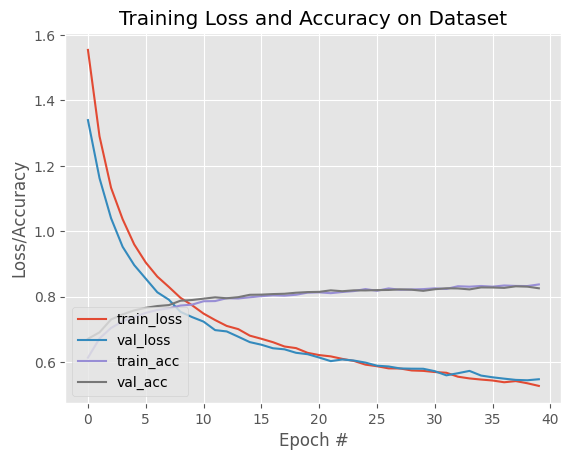

In [45]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["val_loss"], label="val_loss")
plt.plot(H["train_acc"], label="train_acc")
plt.plot(H["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [46]:
PATH = "model_weights.pth"

In [47]:
torch.save(model.state_dict(), PATH)

[INFO] performing inference...


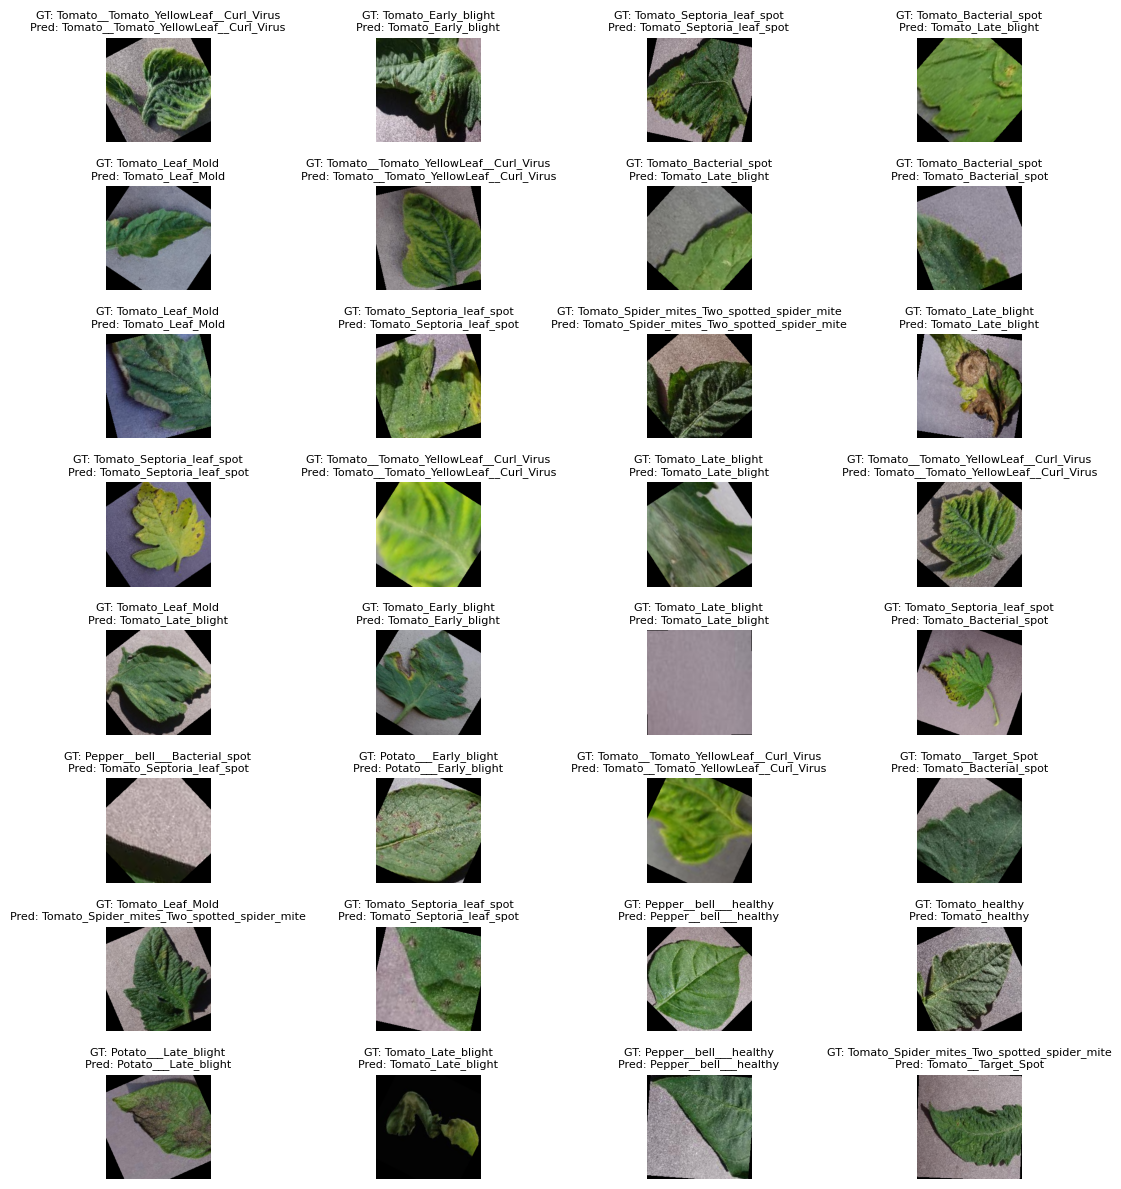

In [53]:
# Grab a batch of test data
batch = next(iter(test_loader))
(images, labels) = (batch[0], batch[1])

# Initialize a larger figure with padding
fig = plt.figure("Results", figsize=(12, 12))

with torch.no_grad():
    # Send the images to the device
    images = images.to(DEVICE)
    
    # Make predictions
    print("[INFO] performing inference...")
    preds = model(images)
    
    # Loop over all the batch
    for i in range(0, min(32, len(images))):  # Limiting to 32 images
        # Initialize a subplot in an 8x4 grid
        ax = plt.subplot(8, 4, i + 1)
        
        # Grab the image, de-normalize it, scale to [0, 255], and transpose
        image = images[i]
        image = image.cpu().numpy()
        image = (image * 255).astype("uint8")
        image = image.transpose((1, 2, 0))  # from (C, H, W) to (H, W, C)
        
        # Grab the ground truth and predicted labels
        idx = labels[i].cpu().item()  # Convert tensor to integer
        gtLabel = ClassIdx_dict[idx]
        pred = preds[i].argmax().cpu().item()  # Convert to integer
        predLabel = ClassIdx_dict[pred]
        
        # Add the results and image to the plot
        info = f"GT: {gtLabel}\nPred: {predLabel}"
        plt.imshow(image)
        plt.title(info, fontsize=8)
        plt.axis("off")

# Adjust layout to add padding between subplots and reduce overlaps
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()


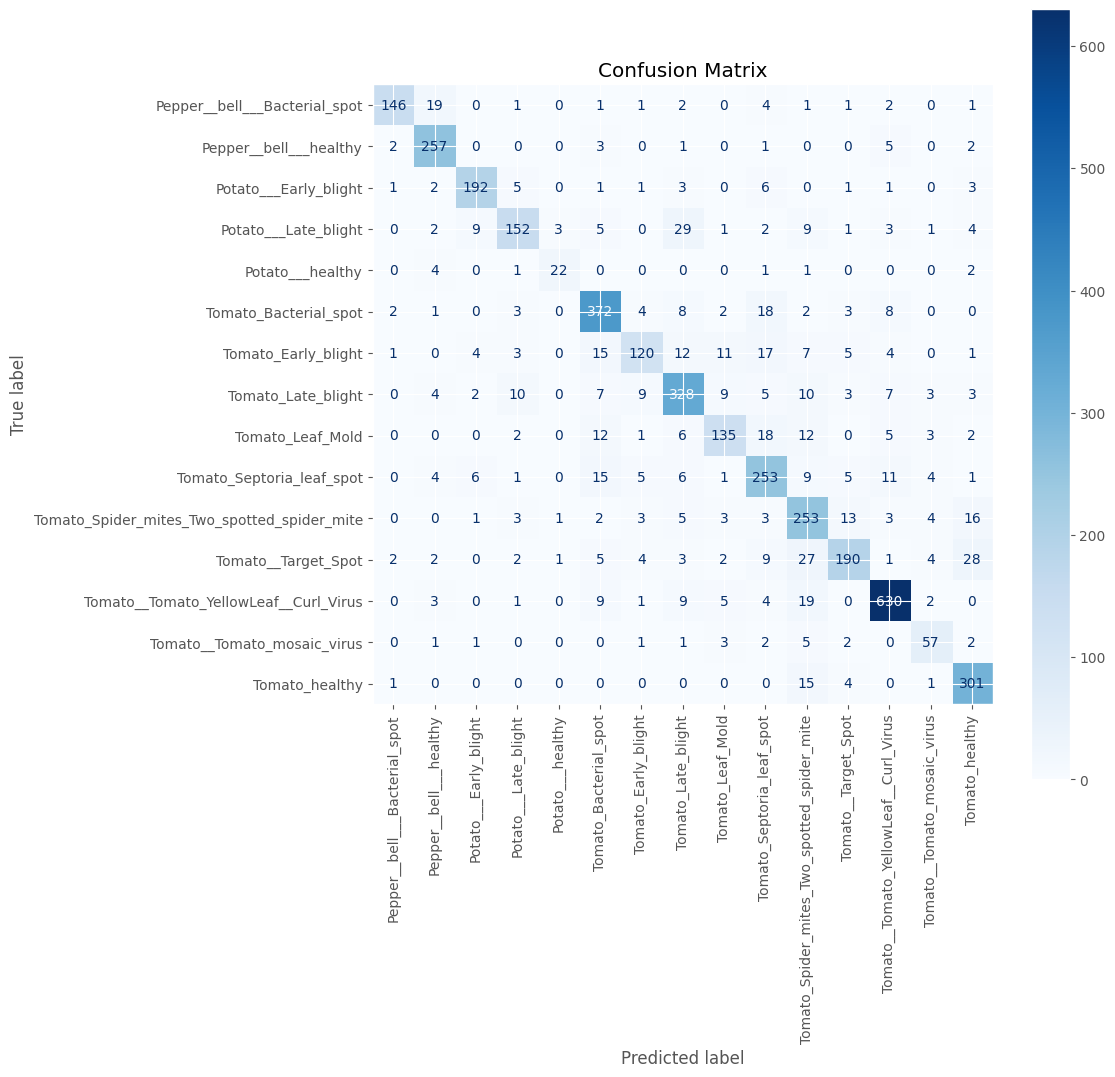

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Collect all predictions and true labels
all_preds = []
all_labels = []

# Disable gradient tracking
with torch.no_grad():
    model.eval()
    for (images, labels) in test_loader:

        images, labels = images.to(DEVICE), labels.to(DEVICE)
        
        # Make predictions
        preds = model(images)
        preds = preds.argmax(dim=1)  
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ClassIdx_dict.values())


# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()